# Loan Default Dataset - EDA

In [1]:
# Loading the dataset

# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Loan_Default.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "yasserh/loan-default-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

  Using cached kagglehub-0.3.13-py3-none-any.whl.metadata (38 kB)
Using cached kagglehub-0.3.13-py3-none-any.whl (68 kB)


/tmp/ipykernel_444/3989379876.py:12: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [3]:
# First, we take a peek at what the dataset looks like

df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
df.shape

(148670, 34)

In [5]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [6]:
# Renaming some columns for consistency

df = df.rename(columns={'ID': 'id', 'Gender': 'gender', 'Credit_Worthiness': 'credit_worthiness', 
                        'Interest_rate_spread': 'interest_rate_spread', 'Upfront_charges': 'upfront_charges', 
                       'Neg_ammortization': 'neg_ammortization', 'Secured_by': 'secured_by', 
                       'Credit_Score': 'credit_score', 'LTV': 'ltv', 'Region': 'region',
                       'Security_Type': 'security_type', 'Status': 'status'})

In [7]:
# Overview of information about the variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   credit_worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  interest_rate_spread       112031 non-null  float64
 13  upfront_charges            10

In [8]:
# Basic statistics for numerical columns

df.describe()

,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [9]:
# `status` is the variable for loan default - here, we are seeing the proportion of defaults and non-defaults

df["status"].value_counts()

status
0    112031
1     36639
Name: count, dtype: int64

In [10]:
# Calculating class distributions for `status`, the target variable
# As seen below, there is approximately a 75% vs 25 split

df["status"].value_counts(normalize=True) * 100

status
0    75.355485
1    24.644515
Name: proportion, dtype: float64

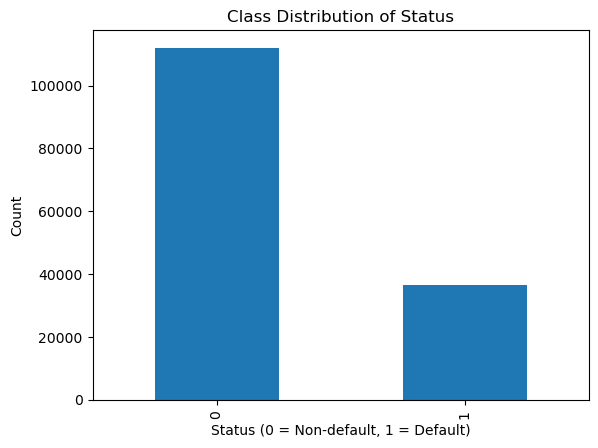

In [11]:
# Plot the target variable to visualize imbalance
# As seen below, there is a considerable imbalance in the target variable as there are many more non-defaults than defaults

df["status"].value_counts().plot(kind = "bar", title = "Defaults vs. Non-Defaults")
plt.title("Class Distribution of Status")
plt.xlabel("Status (0 = Non-default, 1 = Default)")
plt.ylabel("Count")
plt.show()

In [12]:
# Checking to see which variables have missing values

df.isnull().sum()

id                               0
year                             0
loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [13]:
# Missing data in percentages - highest % missing is ~27%

(df.isna().mean() * 100).round(2)

id                            0.00
year                          0.00
loan_limit                    2.25
gender                        0.00
approv_in_adv                 0.61
loan_type                     0.00
loan_purpose                  0.09
credit_worthiness             0.00
open_credit                   0.00
business_or_commercial        0.00
loan_amount                   0.00
rate_of_interest             24.51
interest_rate_spread         24.64
upfront_charges              26.66
term                          0.03
neg_ammortization             0.08
interest_only                 0.00
lump_sum_payment              0.00
property_value               10.16
construction_type             0.00
occupancy_type                0.00
secured_by                    0.00
total_units                   0.00
income                        6.15
credit_type                   0.00
credit_score                  0.00
co-applicant_credit_type      0.00
age                           0.13
submission_of_applic

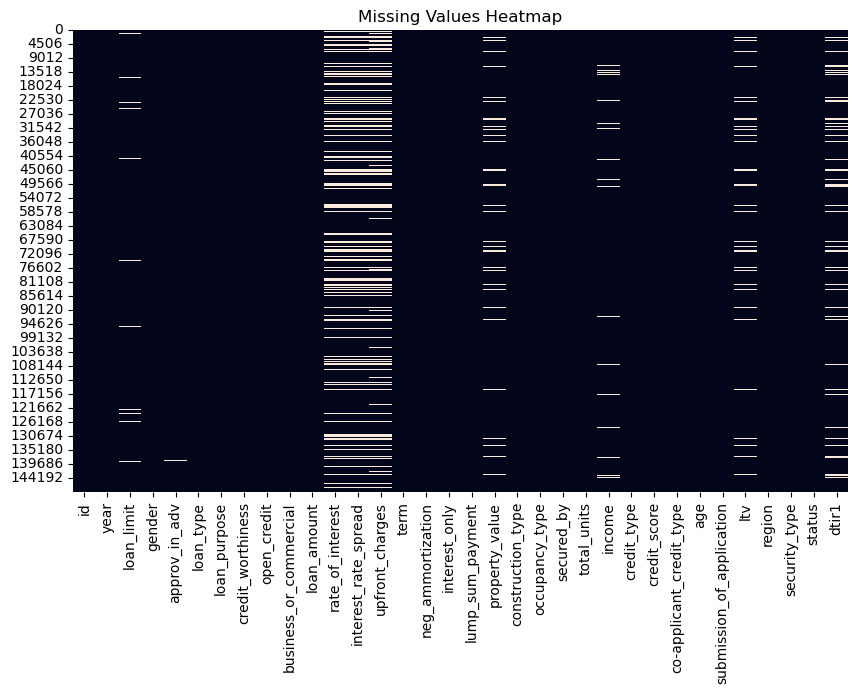

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

## Univariate Analysis

### Numerical Variables

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'rate_of_interest'}>],
       [<Axes: title={'center': 'interest_rate_spread'}>,
        <Axes: title={'center': 'upfront_charges'}>,
        <Axes: title={'center': 'term'}>,
        <Axes: title={'center': 'property_value'}>],
       [<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'ltv'}>,
        <Axes: title={'center': 'status'}>],
       [<Axes: title={'center': 'dtir1'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

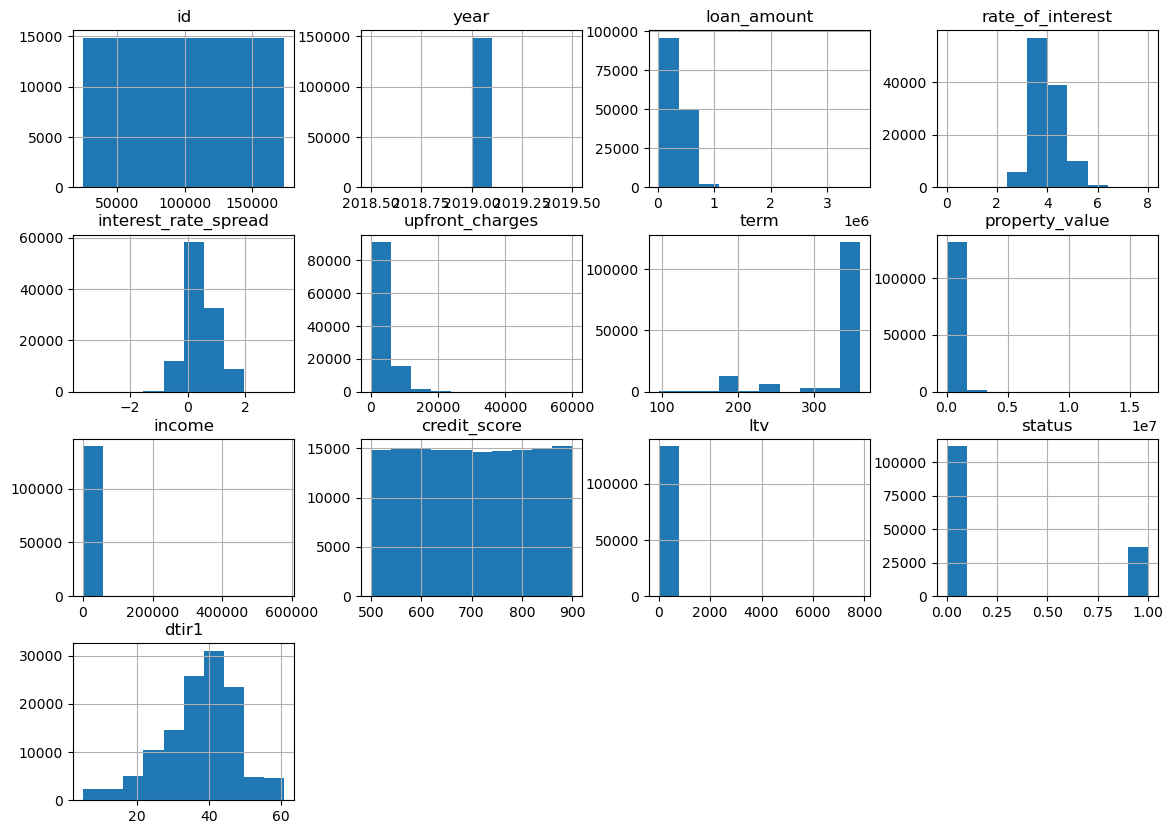

In [15]:
# Histogram overview of all numerical variables

df.hist(figsize = (14,10))

In [16]:
df["loan_amount"].describe()

count    1.486700e+05
mean     3.311177e+05
std      1.839093e+05
min      1.650000e+04
25%      1.965000e+05
50%      2.965000e+05
75%      4.365000e+05
max      3.576500e+06
Name: loan_amount, dtype: float64

<Axes: xlabel='loan_amount', ylabel='Count'>

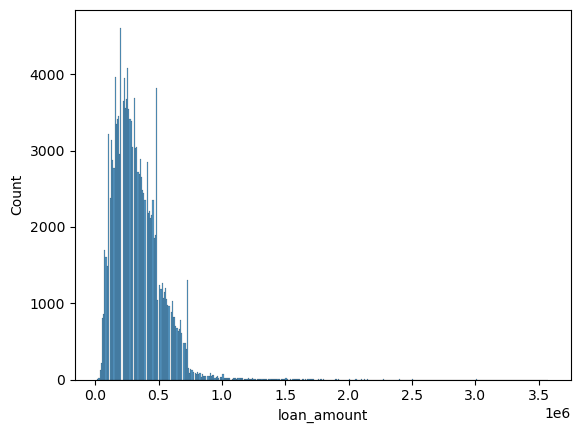

In [17]:
# As seen below, the data is skewed to the left
# There are a few very high loans in the millions while half are under $300,000

sns.histplot(x = "loan_amount", discrete = False, data = df)

In [18]:
df["rate_of_interest"].describe()

count    112231.000000
mean          4.045476
std           0.561391
min           0.000000
25%           3.625000
50%           3.990000
75%           4.375000
max           8.000000
Name: rate_of_interest, dtype: float64

<Axes: xlabel='rate_of_interest', ylabel='Count'>

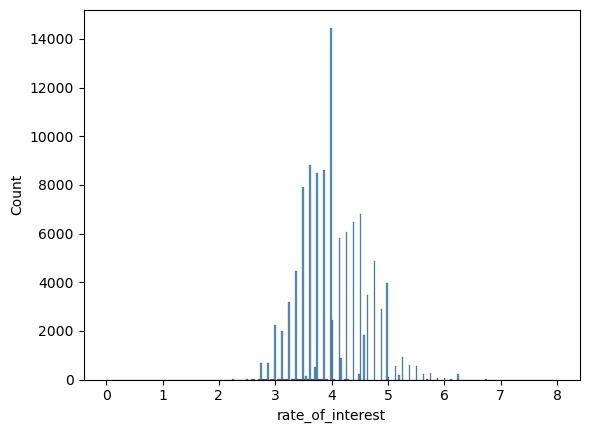

In [19]:
# Interest rate is more normally-distributed in comparison

sns.histplot(x = "rate_of_interest", discrete = False, data = df)

In [20]:
df["interest_rate_spread"].describe()

count    112031.000000
mean          0.441656
std           0.513043
min          -3.638000
25%           0.076000
50%           0.390400
75%           0.775400
max           3.357000
Name: interest_rate_spread, dtype: float64

<Axes: xlabel='interest_rate_spread', ylabel='Count'>

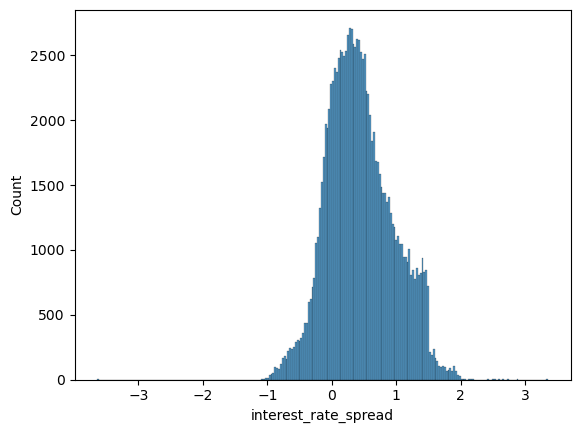

In [21]:
sns.histplot(x = "interest_rate_spread", discrete = False, data = df)

In [22]:
df["upfront_charges"].describe()

count    109028.000000
mean       3224.996127
std        3251.121510
min           0.000000
25%         581.490000
50%        2596.450000
75%        4812.500000
max       60000.000000
Name: upfront_charges, dtype: float64

<Axes: xlabel='upfront_charges', ylabel='Count'>

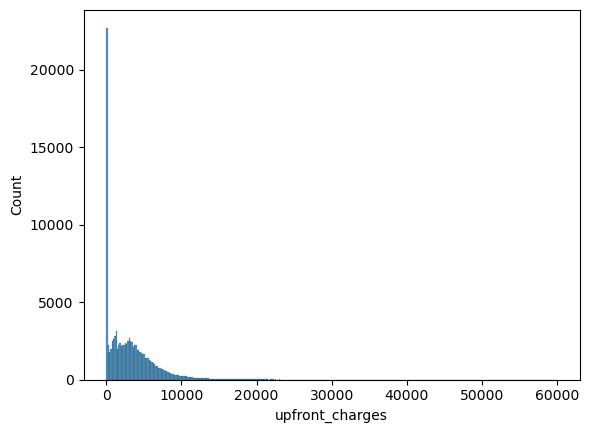

In [23]:
# Majority of loans do not require any upfront charges

sns.histplot(x = "upfront_charges", discrete = False, data = df)

In [24]:
df["term"].describe()

count    148629.000000
mean        335.136582
std          58.409084
min          96.000000
25%         360.000000
50%         360.000000
75%         360.000000
max         360.000000
Name: term, dtype: float64

<Axes: xlabel='term', ylabel='Count'>

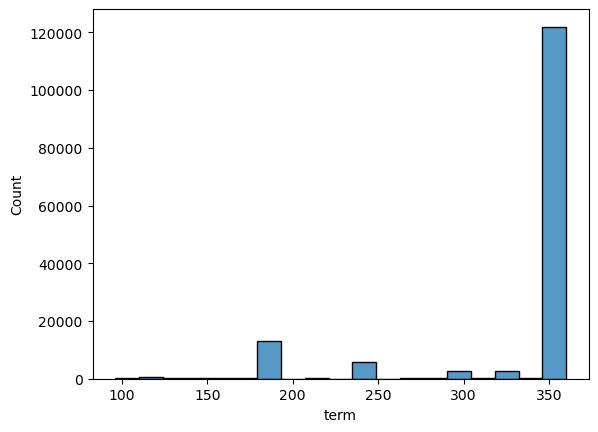

In [25]:
# Most loans have a term of 360 months (=30 years), so the data is skewed heavily to the right

sns.histplot(x = "term", discrete = False, data = df)

In [26]:
df["property_value"].describe()

count    1.335720e+05
mean     4.978935e+05
std      3.599353e+05
min      8.000000e+03
25%      2.680000e+05
50%      4.180000e+05
75%      6.280000e+05
max      1.650800e+07
Name: property_value, dtype: float64

<Axes: xlabel='property_value', ylabel='Count'>

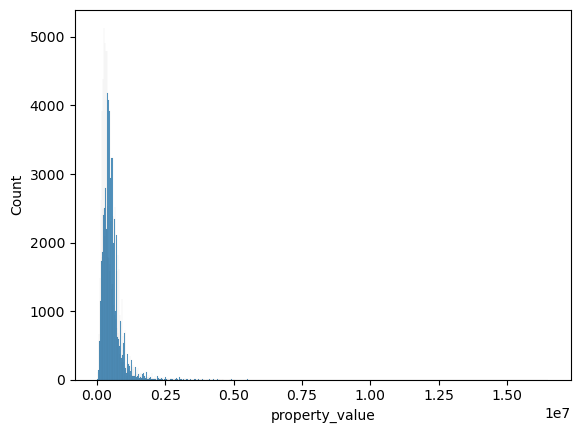

In [27]:
# Very wide range of values when it comes to properties (stdev is high)

sns.histplot(x = "property_value", discrete = False, data = df)

In [28]:
df["income"].describe()

count    139520.000000
mean       6957.338876
std        6496.586382
min           0.000000
25%        3720.000000
50%        5760.000000
75%        8520.000000
max      578580.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

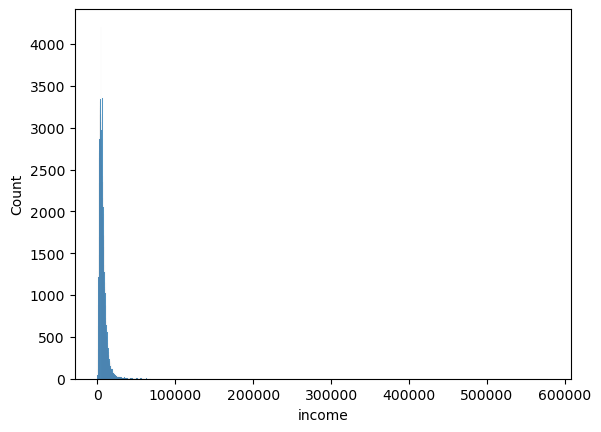

In [29]:
# Another variable whose stdev is very high
# Borrowers from this dataset tend to have lower incomes

sns.histplot(x = "income", discrete = False, data = df)

In [30]:
df["credit_score"].describe()

count    148670.000000
mean        699.789103
std         115.875857
min         500.000000
25%         599.000000
50%         699.000000
75%         800.000000
max         900.000000
Name: credit_score, dtype: float64

<Axes: xlabel='credit_score', ylabel='Count'>

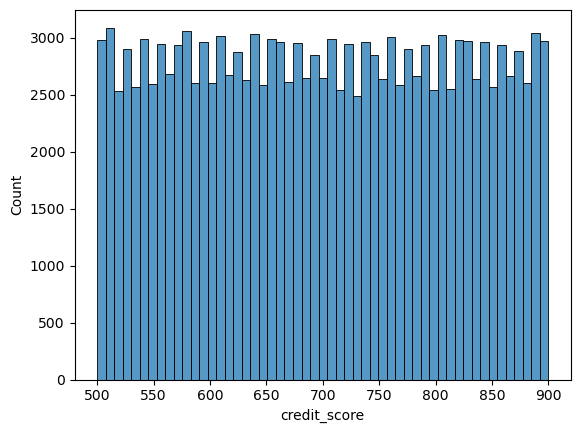

In [31]:
sns.histplot(x = "credit_score", discrete = False, data = df)

In [32]:
df["ltv"].describe()

count    133572.000000
mean         72.746457
std          39.967603
min           0.967478
25%          60.474860
50%          75.135870
75%          86.184211
max        7831.250000
Name: ltv, dtype: float64

<Axes: xlabel='ltv', ylabel='Count'>

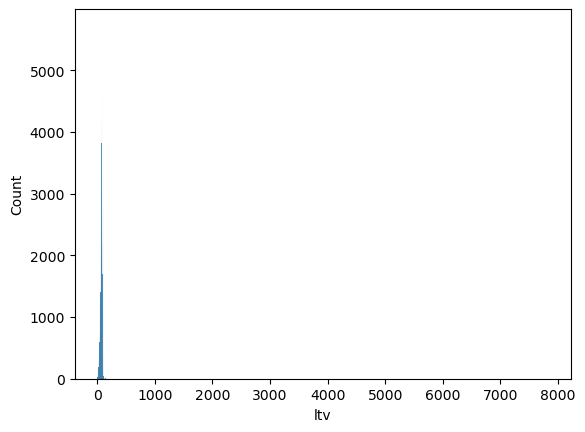

In [33]:
# Data is strongly skewed to the left, but there are a few very high loan-to-value ratios

sns.histplot(x = "ltv", discrete = False, data = df)

In [34]:
df["dtir1"].describe()

count    124549.000000
mean         37.732932
std          10.545435
min           5.000000
25%          31.000000
50%          39.000000
75%          45.000000
max          61.000000
Name: dtir1, dtype: float64

<Axes: xlabel='dtir1', ylabel='Count'>

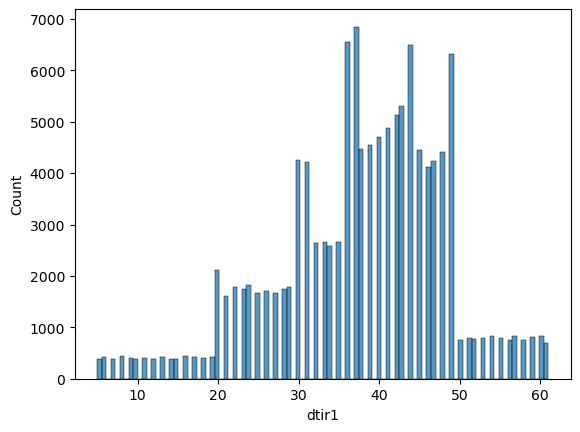

In [35]:
# Data is slightly skewed to the right - people tend to have relatively higher debt-to-income ratios

sns.histplot(x = "dtir1", discrete = False, data = df)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

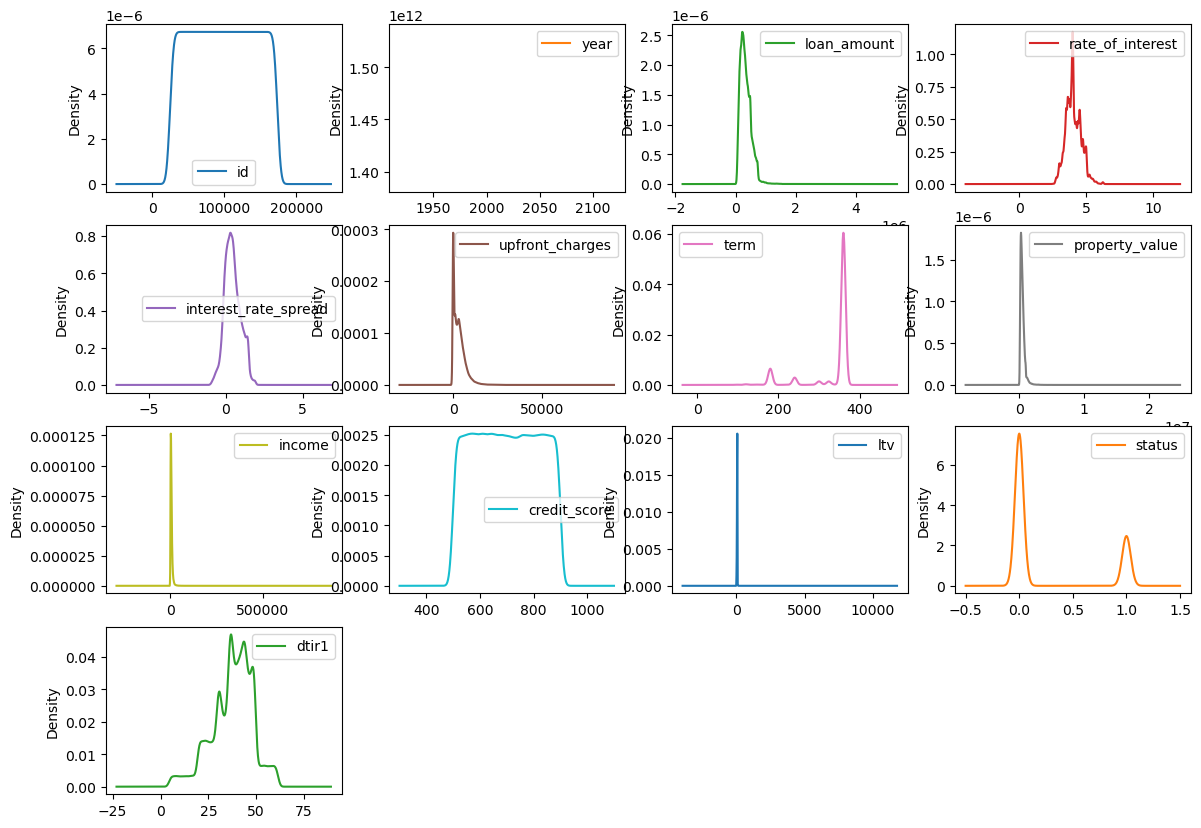

In [36]:
# Density plots to examine the distributions

df.plot(figsize = (14,10), kind = "density", subplots = True, layout = (4,4), sharex = False)

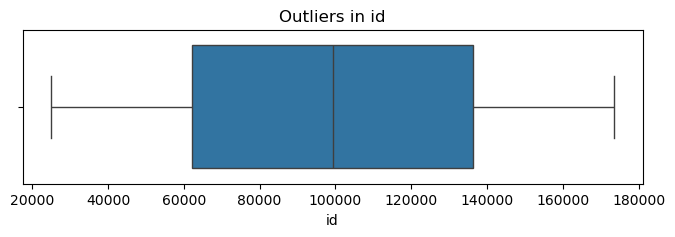

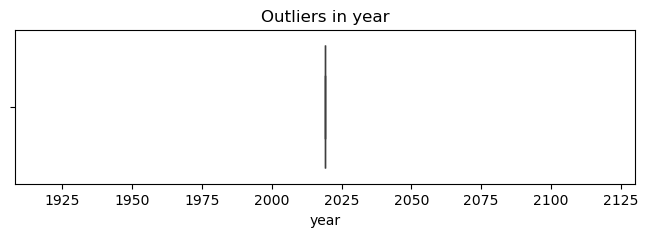

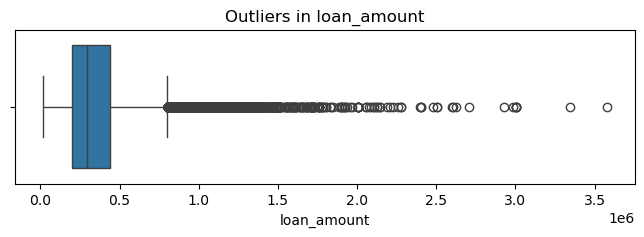

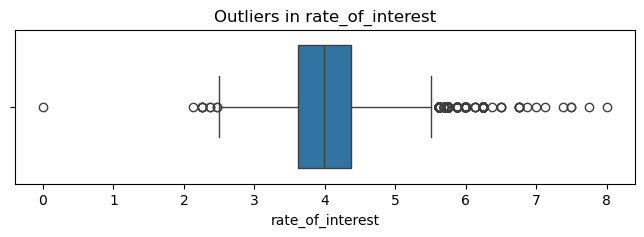

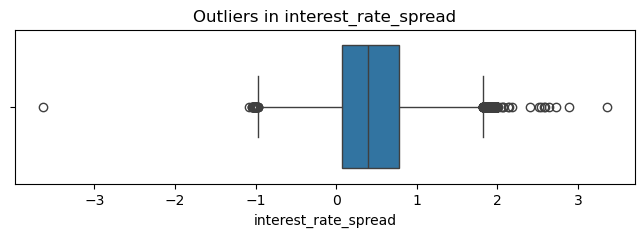

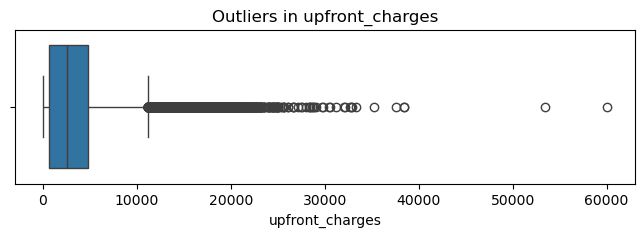

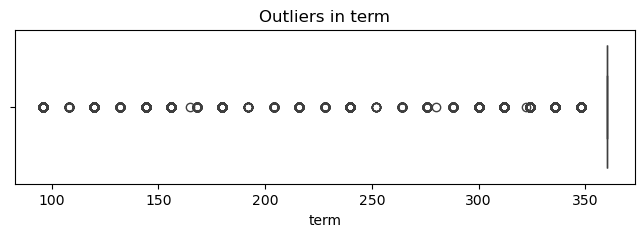

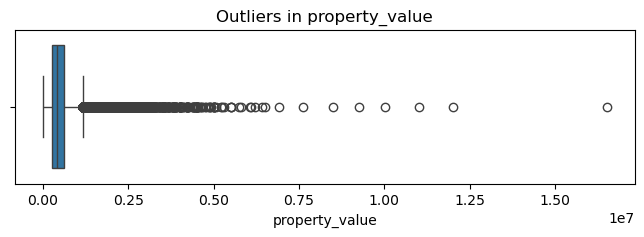

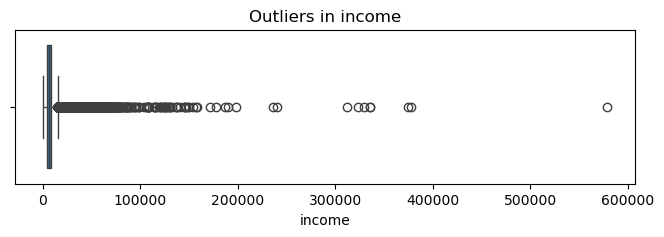

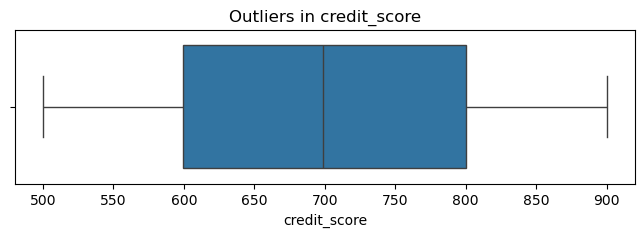

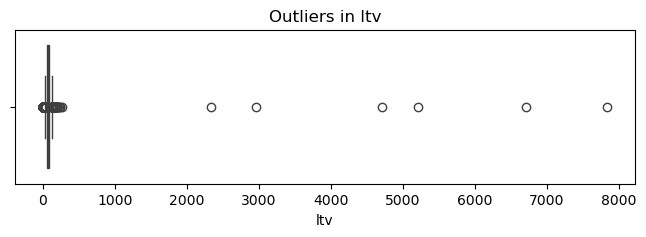

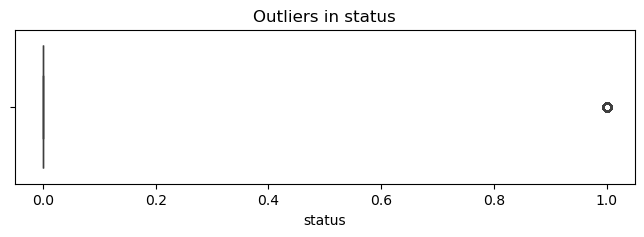

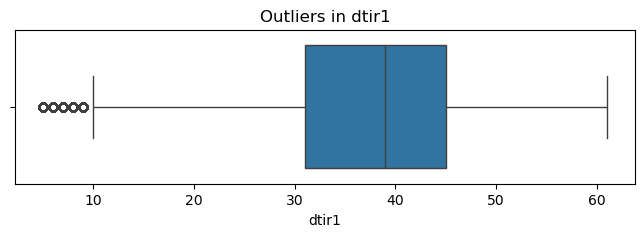

In [49]:
# Box plots to observe outliers
# Variables with the most outliers: loan_amount, upfront_charges, term, property_value, income, and ltv

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

### Categorical Variables

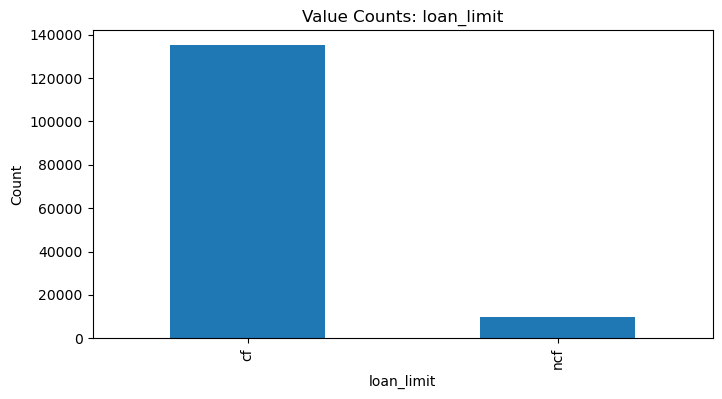

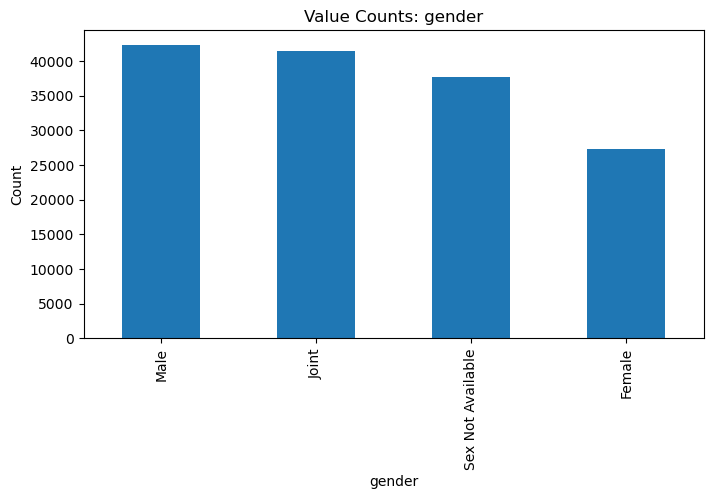

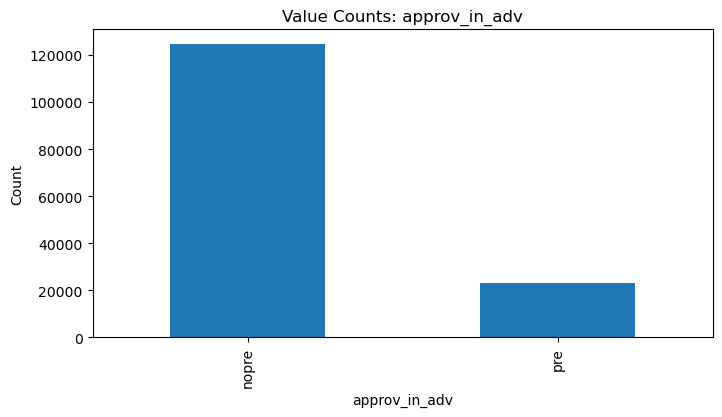

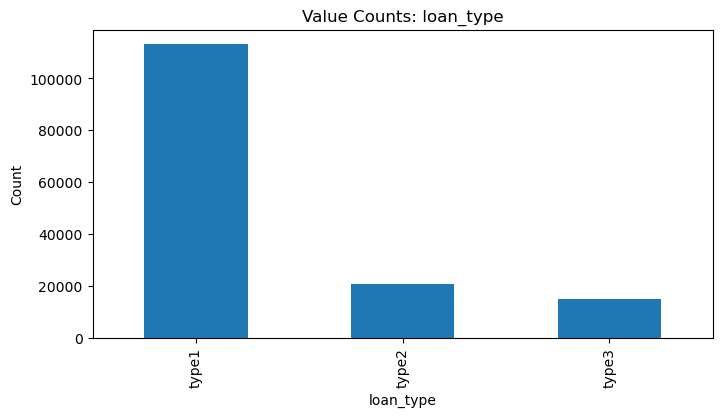

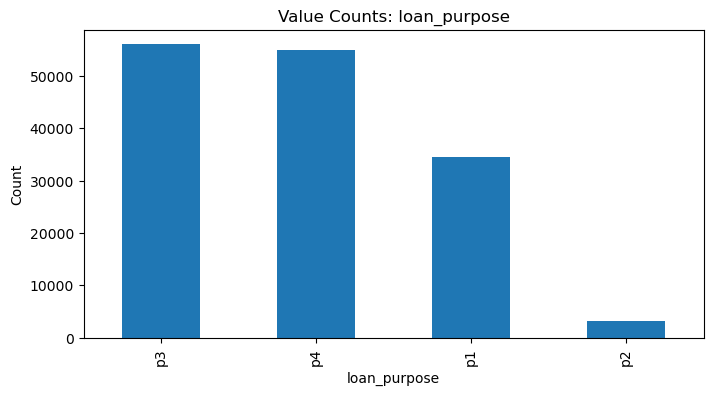

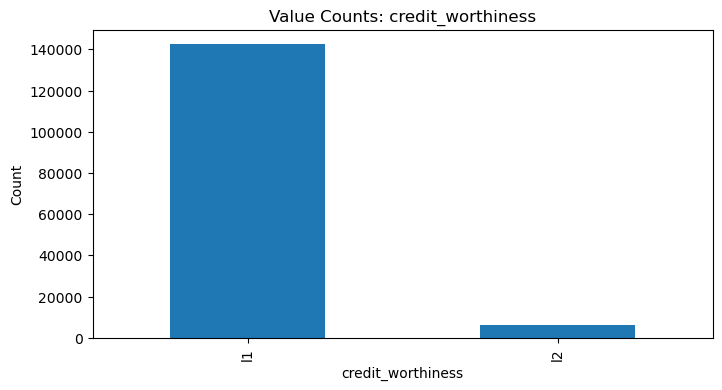

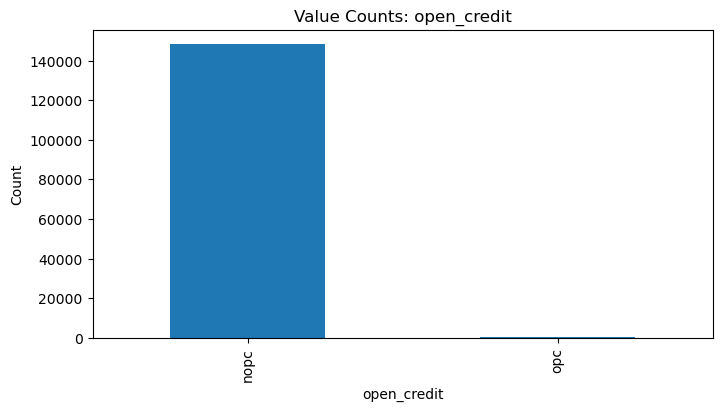

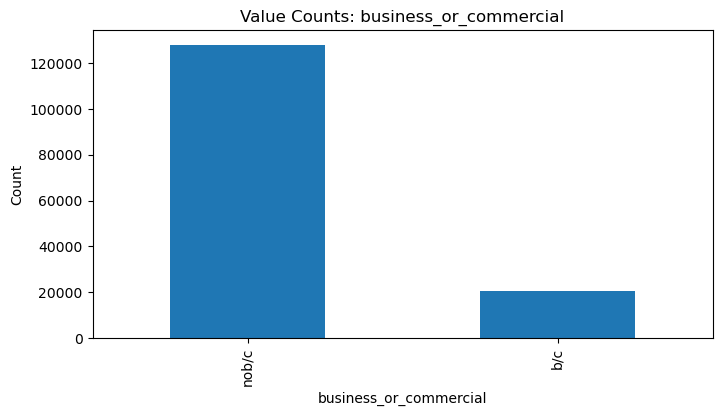

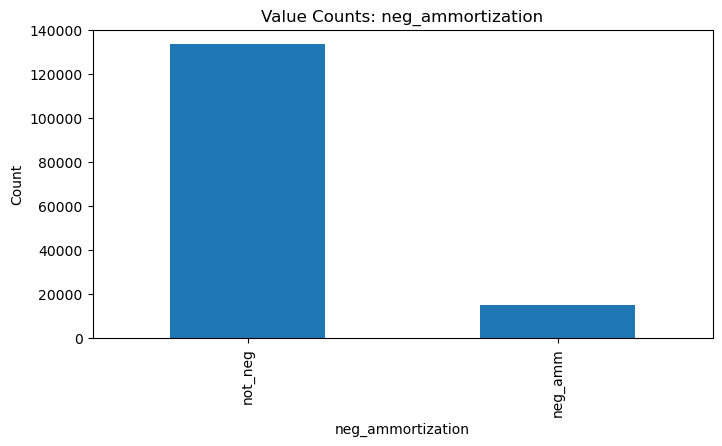

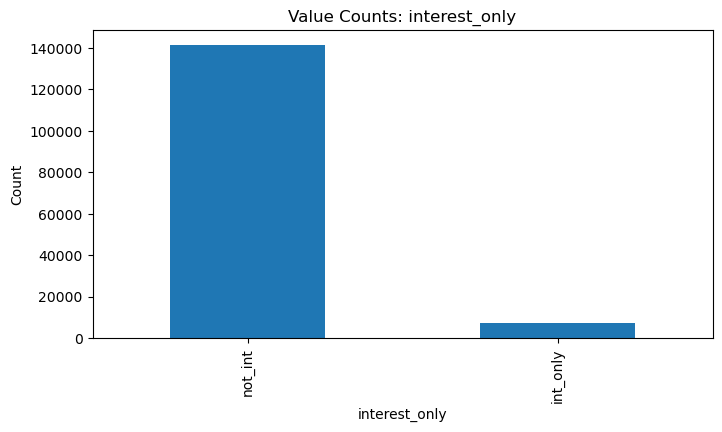

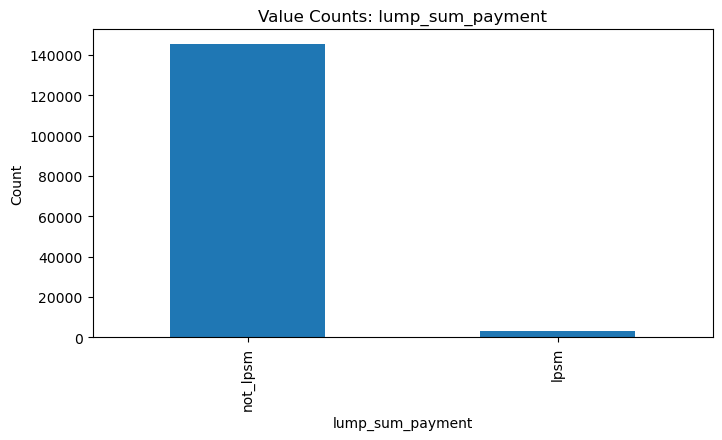

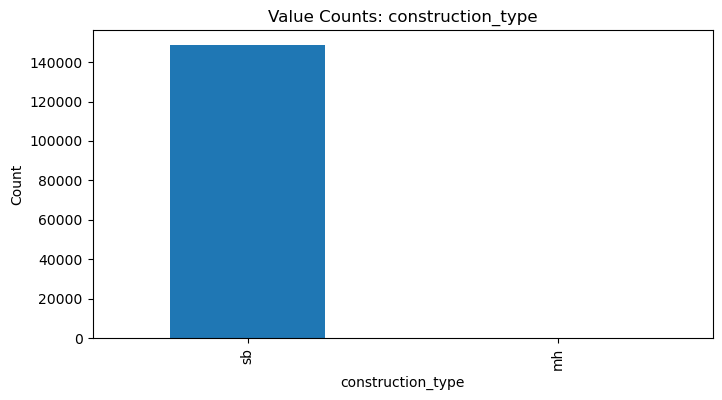

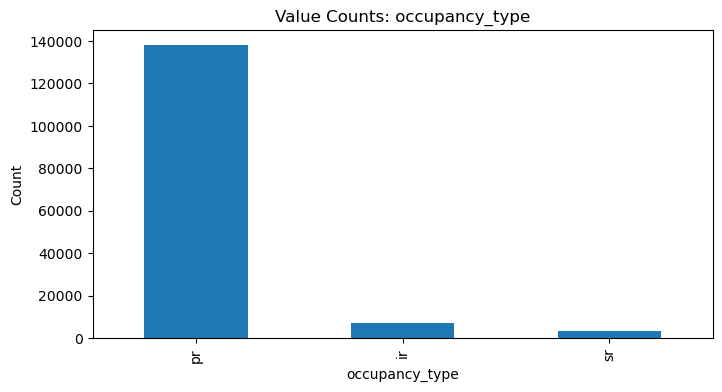

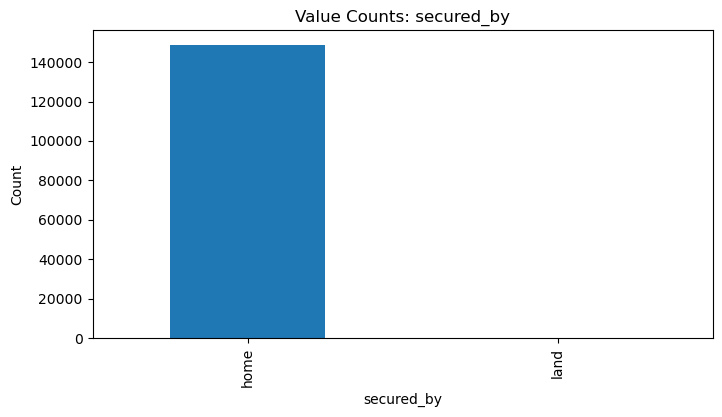

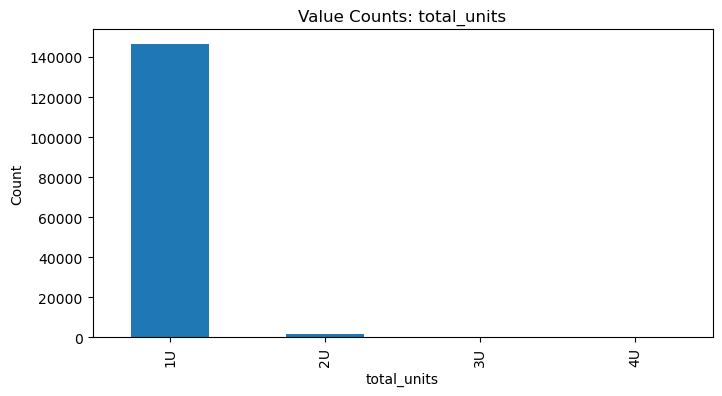

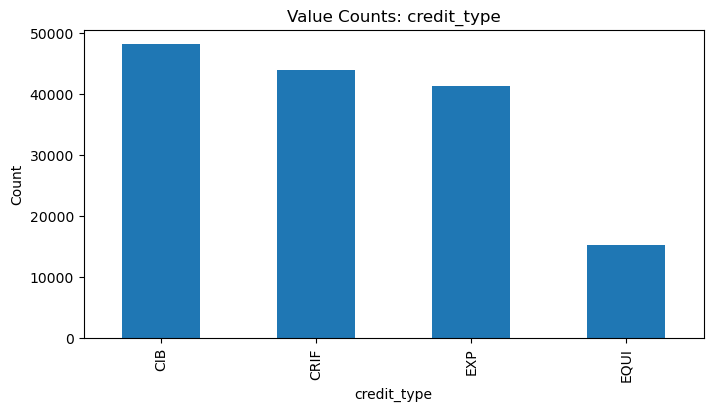

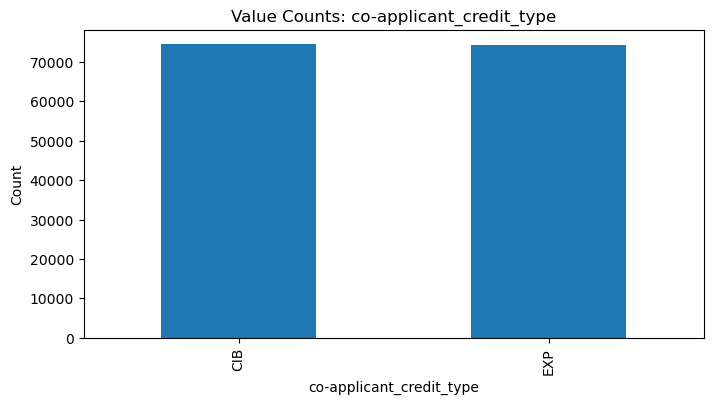

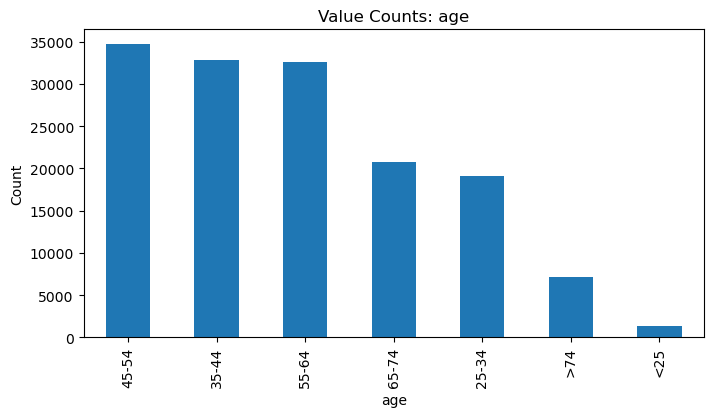

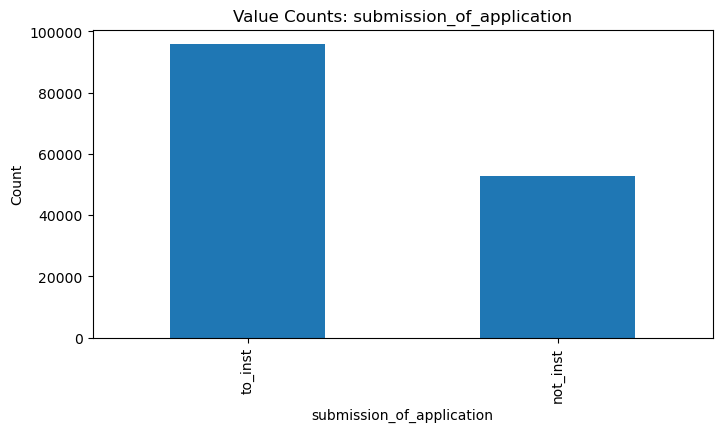

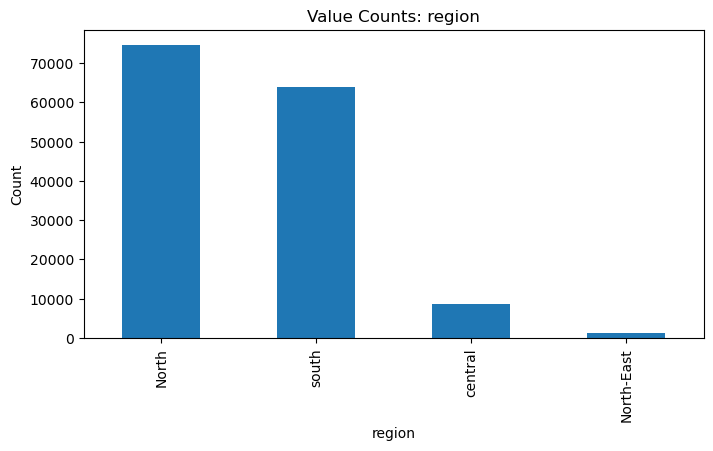

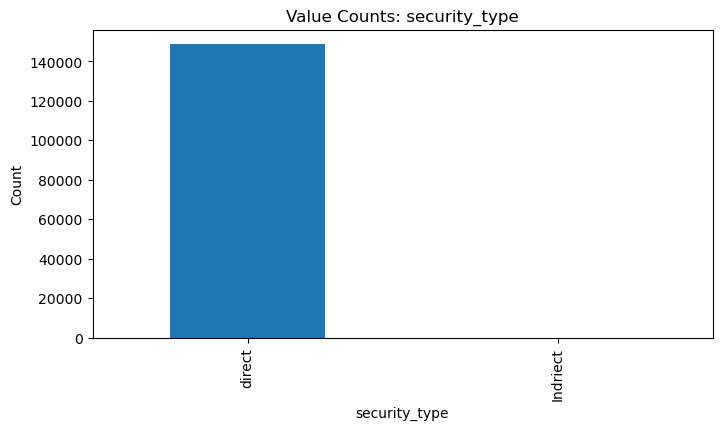

In [40]:
# Separating categorical variables and plotting bar charts for each

# From the results below: most loans are conforming, were not approved in advance, are loan type 1,
# are personal loans, do not have negative amortization, does not have an interest-only option,
# does not require a lump-sum payment at the end, and use direct collateral.
# Additionally, most borrowers are of L1 rating and have no open credit.
# Overall, many of the variables are heavily skewed.

categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(20).plot(kind='bar')
    plt.title(f"Value Counts: {col}")
    plt.ylabel("Count")
    plt.show()

## Bivariate Analysis

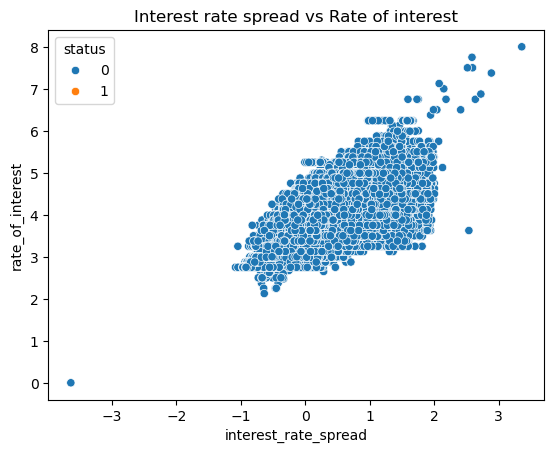

In [51]:
# Examining the relationship between some of the variables with the most missing values

sns.scatterplot(x = 'interest_rate_spread', y = 'rate_of_interest', hue = 'status', data = df)
plt.title('Interest Rate Spread vs Rate of Interest')
plt.show()

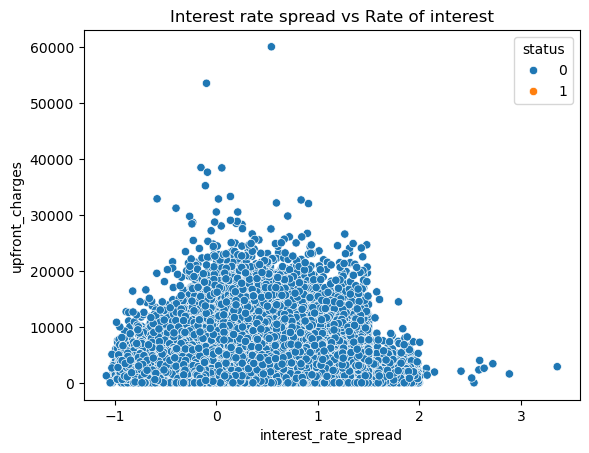

In [52]:
sns.scatterplot(x = 'interest_rate_spread', y = 'upfront_charges', hue = 'status', data = df)
plt.title('Interest Rate Spread vs Upfront Charges')
plt.show()

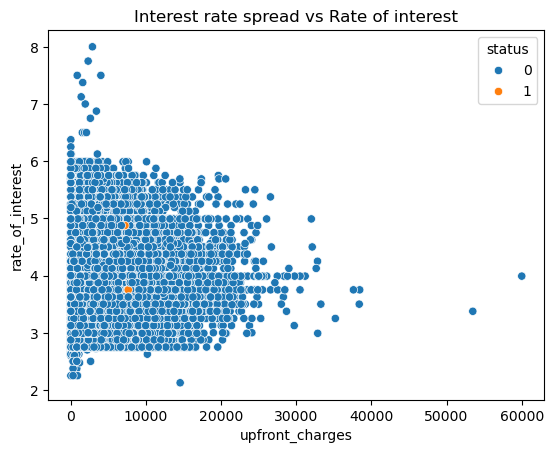

In [53]:
sns.scatterplot(x = 'upfront_charges', y = 'rate_of_interest', hue = 'status', data = df)
plt.title('Upfront Charges vs Rate of Interest')
plt.show()

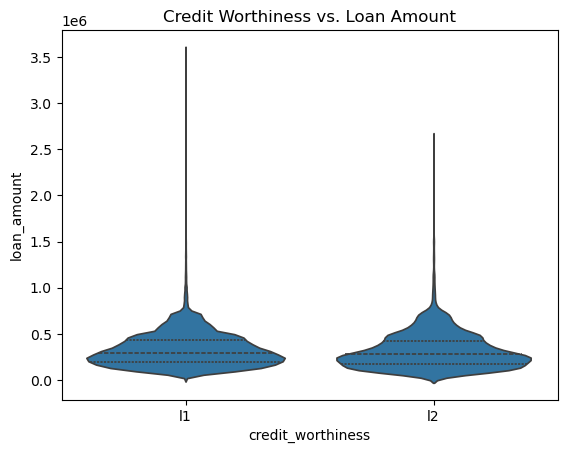

In [62]:
# Violin chart to analyze relationship between loan amount and loan purpose
# No overlap which indicates that credit worthiness is highly predictive of loan purpose (expected)
# Surprisingly, the median is not very different for both, but l1 has a wider range of values

sns.violinplot(x='credit_worthiness', y='loan_amount', data=df, inner='quartile')
plt.title('Credit Worthiness vs. Loan Amount')
plt.show()

## Correlation

[Text(0, 0, 'loan_amount'),
 Text(0, 1, 'rate_of_interest'),
 Text(0, 2, 'interest_rate_spread'),
 Text(0, 3, 'upfront_charges'),
 Text(0, 4, 'term'),
 Text(0, 5, 'property_value'),
 Text(0, 6, 'income'),
 Text(0, 7, 'credit_score'),
 Text(0, 8, 'ltv'),
 Text(0, 9, 'status'),
 Text(0, 10, 'dtir1')]

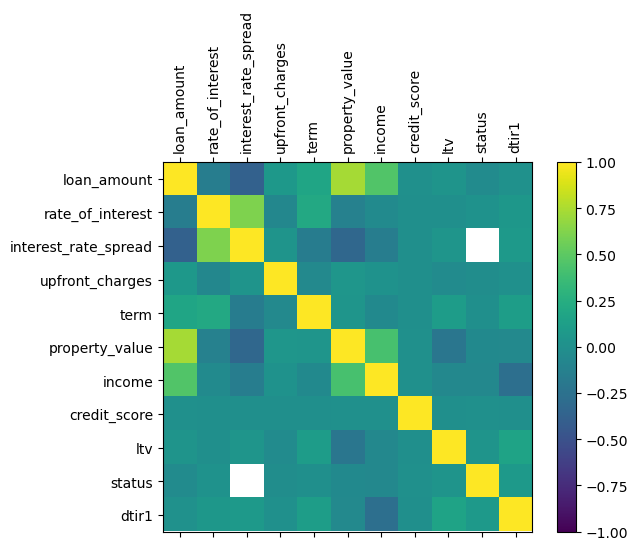

In [47]:
# Plotting correlation

df_corr = df.drop(columns=['id','year'])

correlations = df_corr.corr(numeric_only = True)
correlations

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

# change the tick labels
ticks = range(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
numeric_columns = df_corr.select_dtypes(include='number')
ax.set_xticklabels(numeric_columns, rotation=90)
ax.set_yticklabels(numeric_columns)

In [48]:
# Sorting the numeric variables to see which one has the highest correlations with the target variable
# Based on this analysis, it seems that none of the variables are very correlated with `status
# (which goes against some of the bivariate analysis above)

target_corr = correlations["status"].sort_values(ascending=False)
target_corr

status                  1.000000
dtir1                   0.078083
ltv                     0.038895
rate_of_interest        0.022957
credit_score            0.004004
term                   -0.000240
upfront_charges        -0.019138
loan_amount            -0.036825
property_value         -0.048864
income                 -0.065119
interest_rate_spread         NaN
Name: status, dtype: float64